# Нелинейная регрессия
Необходимо реализовать нейросетевую аппроксимацию для каждой из двух следущих функций, заданных на отрезке:  

$f_1(x) = \sin(x + x^2), x\in[0, 5]$

$f_2(x) = ln(x + 2 \sin x), x\in[1, 10]$


In [1]:
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Hyper-parameters 
input_size = 1
hidden_size1 = 200
hidden_size2 = 100
hidden_size3 = 50
hidden_size4 = 25
num_classes = 1
num_epochs = 200000
learning_rate1 = 0.01
learning_rate2 = 0.005

In [3]:
class Nonlinear_Regression(torch.nn.Module):   
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, num_classes):
        super().__init__()
        
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.hidden_size3 = hidden_size3
        self.hidden_size4 = hidden_size4
        self.num_classes = num_classes
        
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.tanh = nn.Tanh()
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu = nn.ReLU()
        self.layer3 = nn.Linear(hidden_size2, hidden_size3)
        self.sigmoid1 = nn.Sigmoid()
        self.layer4 = nn.Linear(hidden_size3, hidden_size4)
        self.sigmoid2 = nn.Sigmoid()
        self.layer5 = nn.Linear(hidden_size4, num_classes)
        
    def forward(self, x):
        
        out = self.tanh(self.layer1(x))
        out = self.relu(self.layer2(out))
        out = self.sigmoid1(self.layer3(out))
        out = self.sigmoid2(self.layer4(out))
        out = self.layer5(out)
        
        return out

In [4]:
def Draw(x, y, a):
    
    fig, ax = plt.subplots(figsize=(10, 7))

    ax.plot(x, y, a,  color = 'violet')

    ax.set_xlabel(r'$x$', fontsize = 18, color = 'mediumvioletred')
    ax.set_ylabel(r'$y$', fontsize = 18, color = 'mediumvioletred')
    ax.grid(color = 'gainsboro')

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['bottom'].set_color('none')

In [31]:
def Draw_Learning(x, y, outputs):
    
    ax.plot(x.numpy(), y.numpy(), 'o',  color = 'violet', label='Actual', markersize=5)
    ax.plot(x.numpy(), outputs.detach().numpy(), 'o',  color = 'aqua', label='Predicted', markersize=2)
    ax.plot(x.numpy(), outputs.detach().numpy(), color = 'aqua')
    ax.grid(color = 'gainsboro')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['bottom'].set_color('none')

## Нарисуем график функции $f_1(x) = \sin(x + x^2), x\in[0, 5]$

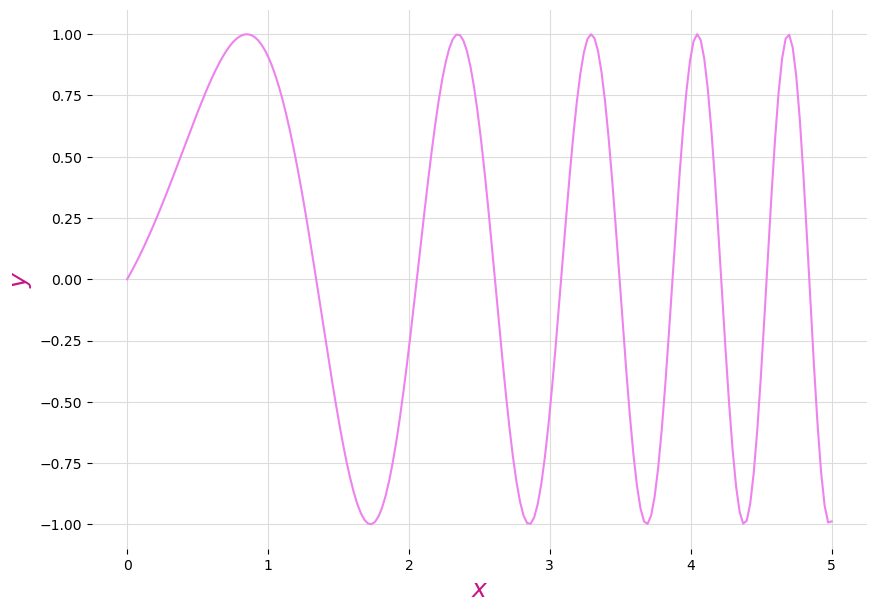

In [6]:
def f1(x):
    return np.sin(x + x**2)

xx1 = np.linspace(0, 5, 200, dtype='float32')
yy1 = f1(xx1)

Draw(xx1, yy1, '')

## Реализуем нейросетевую аппроксимацию для $f_1(x) = \sin(x + x^2), x\in[0, 5]$

### 1. Данные

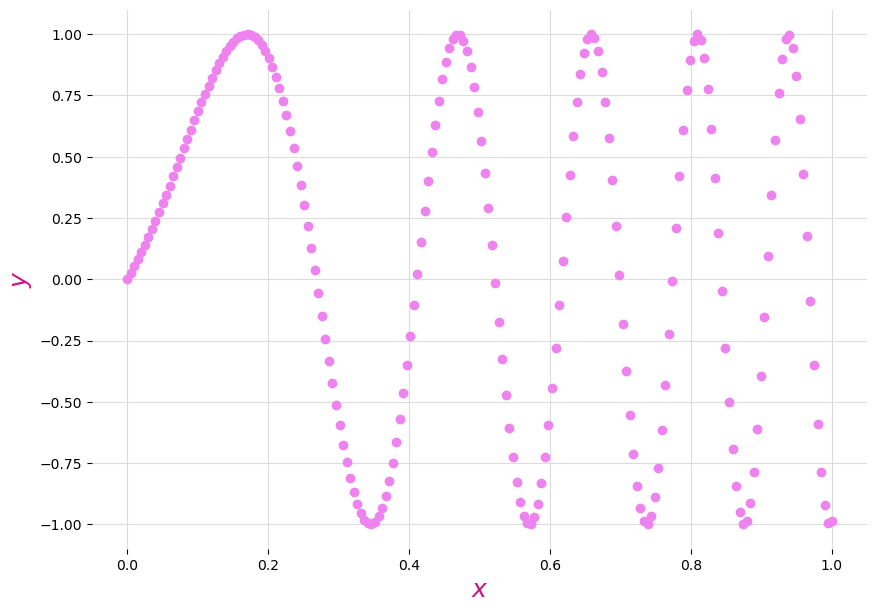

In [7]:
x1_normalized = (xx1 - np.min(xx1)) / (np.max(xx1) - np.min(xx1))
x1_normalized = torch.from_numpy(x1_normalized).reshape(len(x1_normalized), 1).float()
y1 = torch.from_numpy(f1(xx1)).float()

Draw(x1_normalized, y1, 'o')

### 2. Нейронная сеть

In [8]:
model1 = Nonlinear_Regression(input_size=input_size, 
                             hidden_size1=hidden_size1, 
                             hidden_size2=hidden_size2, 
                             hidden_size3=hidden_size3,
                             hidden_size4=hidden_size4,
                             num_classes=num_classes)

In [9]:
model1

Nonlinear_Regression(
  (layer1): Linear(in_features=1, out_features=200, bias=True)
  (tanh): Tanh()
  (layer2): Linear(in_features=200, out_features=100, bias=True)
  (relu): ReLU()
  (layer3): Linear(in_features=100, out_features=50, bias=True)
  (sigmoid1): Sigmoid()
  (layer4): Linear(in_features=50, out_features=25, bias=True)
  (sigmoid2): Sigmoid()
  (layer5): Linear(in_features=25, out_features=1, bias=True)
)

### 3. Оптмизатор и лосс-функция

In [10]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=learning_rate1)

### 4. Обучение

In [11]:
show1 = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model1(x1_normalized)    
    outputs = outputs.view(-1)
    loss = criterion(outputs, y1)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward() 
    optimizer.step()

    if (epoch+1) % 20000 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
        show1.append([x1_normalized, y1, outputs])
        
with torch.no_grad():
    predicted_normalized1 = model1(x1_normalized)
    predicted_normalized1 = predicted_normalized1.view(-1)
    predicted1 = predicted_normalized1 * (np.max(xx1) - np.min(xx1)) + np.min(xx1)

Epoch [20000/200000], Loss: 0.4370
Epoch [40000/200000], Loss: 0.3678
Epoch [60000/200000], Loss: 0.2576
Epoch [80000/200000], Loss: 0.1778
Epoch [100000/200000], Loss: 0.1123
Epoch [120000/200000], Loss: 0.0772
Epoch [140000/200000], Loss: 0.0506
Epoch [160000/200000], Loss: 0.0459
Epoch [180000/200000], Loss: 0.0007
Epoch [200000/200000], Loss: 0.0005


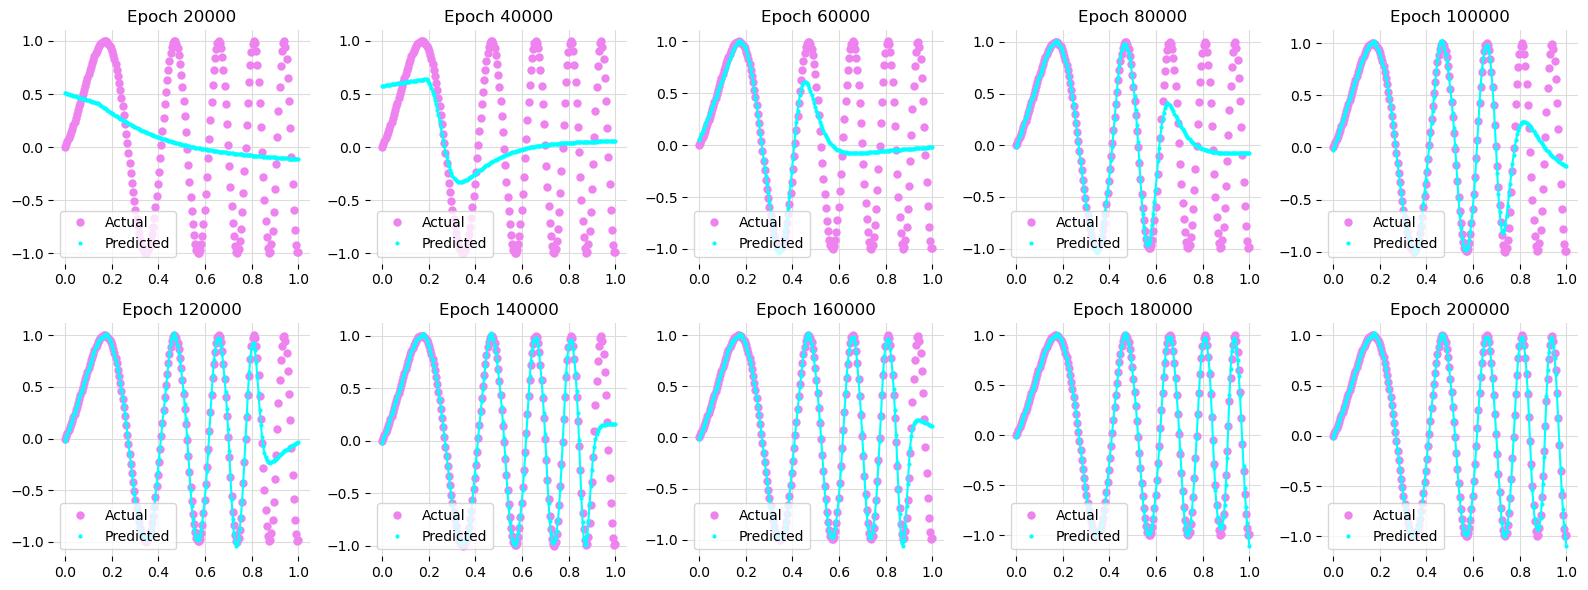

In [33]:
fig, axs = plt.subplots(2, 5, figsize=(16, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.4)

for i in range(len(show1)):
    row, col = i // 5, i % 5
    ax = axs[row, col]
    x, y, outputs = show1[i]
    ax.set_title(f'Epoch {20000 * (i+1)}')
    Draw_Learning(x, y, outputs)
    ax.legend(loc='lower left')
    
plt.tight_layout()

## Результат:

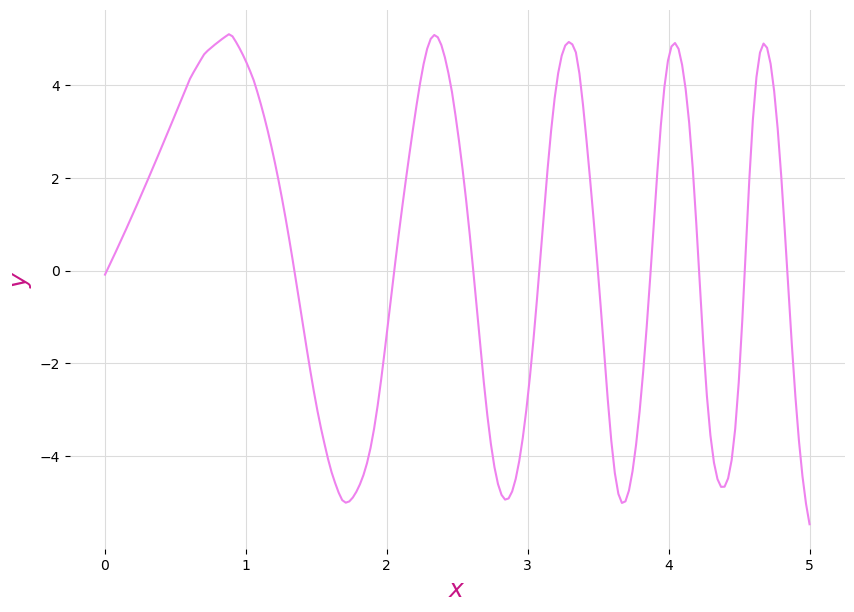

In [13]:
Draw(xx1, predicted1, '')

## Нарисуем график функции $f_2(x) = ln(x + 2 \sin x), x\in[1, 10]$

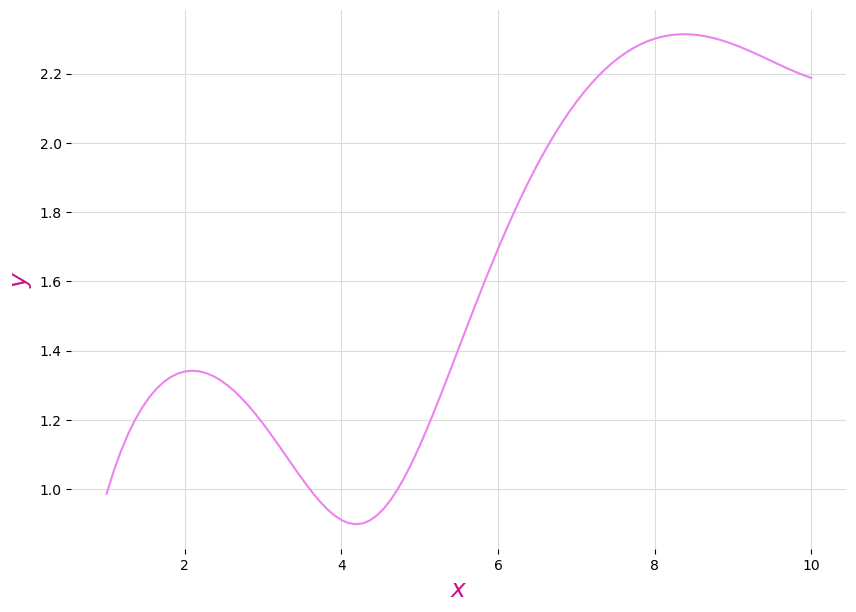

In [14]:
def f2(x):
    return np.log(x + 2 * np.sin(x))

xx2 = np.linspace(1, 10, 100, dtype='float32')
yy2 = f2(xx2)

Draw(xx2, yy2, '')

## Реализуем нейросетевую аппроксимацию для $f_2(x) = ln(x + 2 \sin x), x\in[1, 10]$

### 1. Данные

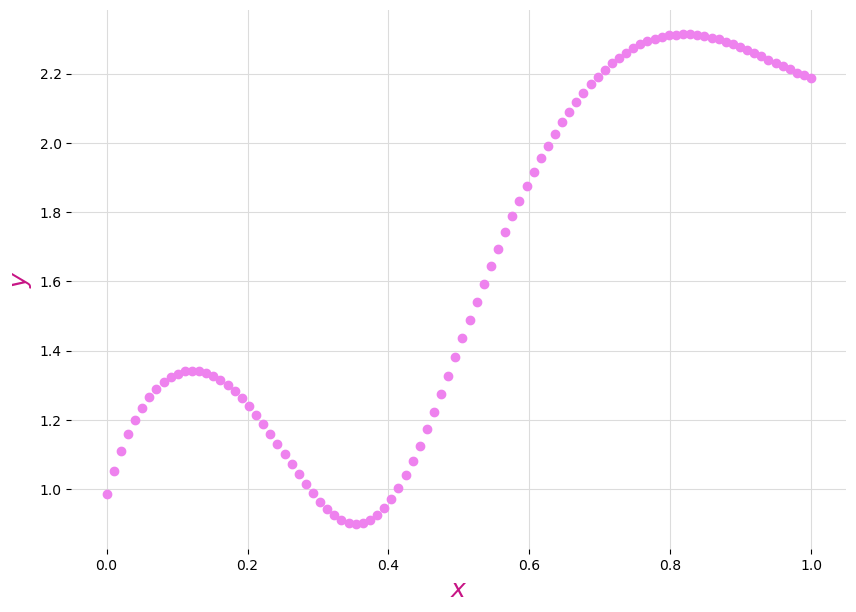

In [36]:
x2_normalized = (xx2 - np.min(xx2)) / (np.max(xx2) - np.min(xx2))
x2_normalized = torch.from_numpy(x2_normalized).reshape(len(x2_normalized), 1).float()
y2 = torch.from_numpy(f2(xx2)).float()

Draw(x2_normalized, y2, 'o')

### 2. Нейронная сеть

In [37]:
model2 = Nonlinear_Regression(input_size=input_size, 
                             hidden_size1=hidden_size1, 
                             hidden_size2=hidden_size2, 
                             hidden_size3=hidden_size3,
                             hidden_size4=hidden_size4,
                             num_classes=num_classes)

In [38]:
model2

Nonlinear_Regression(
  (layer1): Linear(in_features=1, out_features=200, bias=True)
  (tanh): Tanh()
  (layer2): Linear(in_features=200, out_features=100, bias=True)
  (relu): ReLU()
  (layer3): Linear(in_features=100, out_features=50, bias=True)
  (sigmoid1): Sigmoid()
  (layer4): Linear(in_features=50, out_features=25, bias=True)
  (sigmoid2): Sigmoid()
  (layer5): Linear(in_features=25, out_features=1, bias=True)
)

### 3. Оптмизатор и лосс-функция

In [39]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=learning_rate2)

### 4. Обучение

In [40]:
show2 = []
num_epochs = 300000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model2(x2_normalized)    
    outputs = outputs.view(-1)
    loss = criterion(outputs, y2)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward() 
    optimizer.step()

    if (epoch+1) % 30000 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
        show2.append([x2_normalized, y2, outputs])
        
with torch.no_grad():
    predicted_normalized2 = model2(x2_normalized)
    predicted_normalized2 = predicted_normalized2.view(-1)
    predicted2 = predicted_normalized2 * (np.max(xx2) - np.min(xx2)) + np.min(xx2)

Epoch [30000/300000], Loss: 0.0164
Epoch [60000/300000], Loss: 0.0070
Epoch [90000/300000], Loss: 0.0043
Epoch [120000/300000], Loss: 0.0033
Epoch [150000/300000], Loss: 0.0026
Epoch [180000/300000], Loss: 0.0022
Epoch [210000/300000], Loss: 0.0018
Epoch [240000/300000], Loss: 0.0013
Epoch [270000/300000], Loss: 0.0009
Epoch [300000/300000], Loss: 0.0005


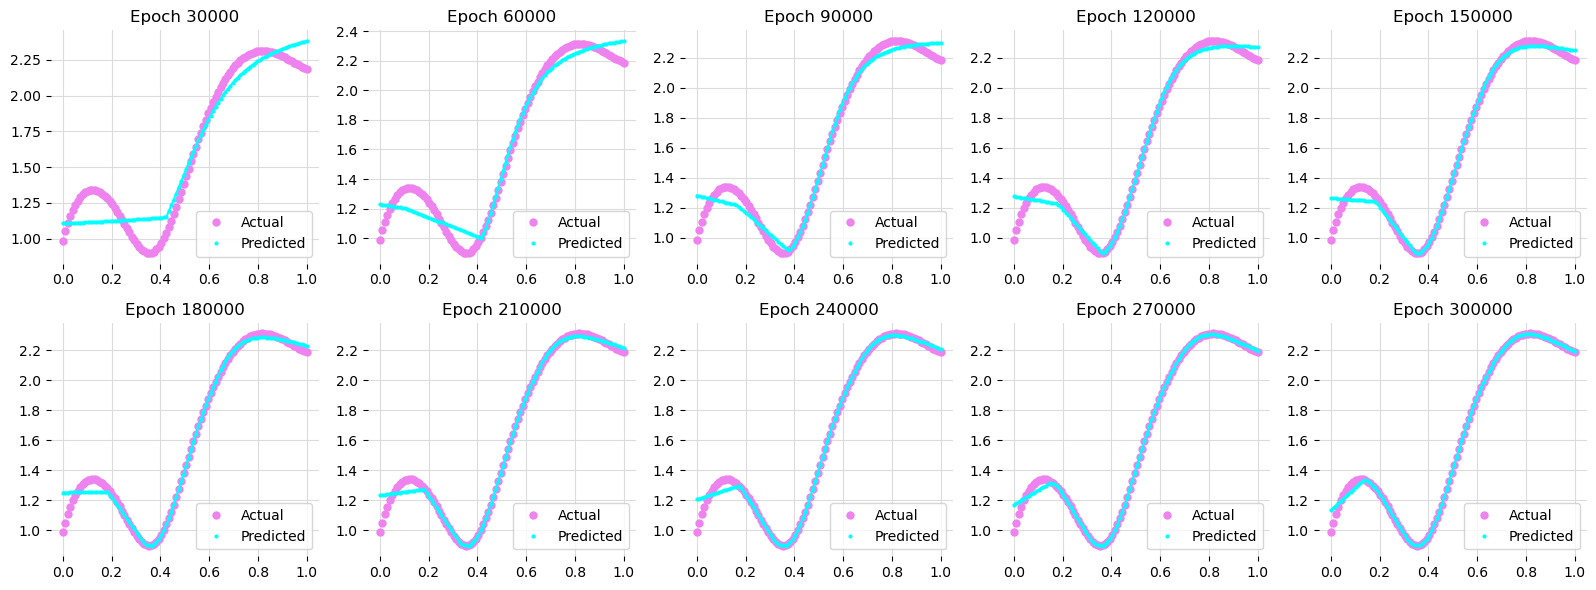

In [43]:
fig, axs = plt.subplots(2, 5, figsize=(16, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.4)

for i in range(len(show2)):
    row, col = i // 5, i % 5
    ax = axs[row, col]
    x, y, outputs = show2[i]
    ax.set_title(f'Epoch {30000 * (i+1)}')
    Draw_Learning(x, y, outputs)
    ax.legend(loc='lower right')
    
plt.tight_layout()

## Результат:

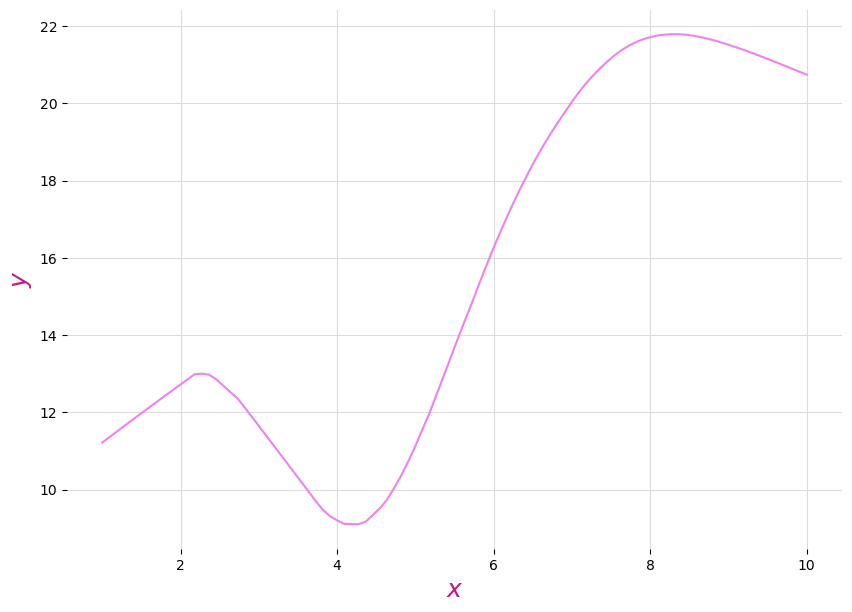

In [44]:
Draw(xx2, predicted2, '')